<a href="https://colab.research.google.com/github/nilesh0109/ML_SoSe19/blob/master/ML_ex05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [0]:
data = np.loadtxt('dataCircle.txt')
df = pd.DataFrame(data, columns=['x1', 'x2', 'label'])


In [0]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

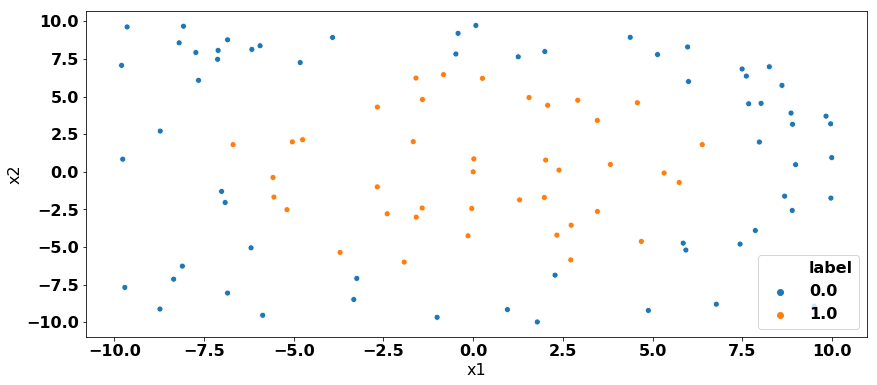

In [15]:
fig, ax= plt.subplots(1,1, figsize=(14,6))
sns.scatterplot(df['x1'], df['x2'], hue=df['label'], hue_norm=(0,1), ax=ax)

In [0]:
#Step 1
#Giving initial weights and changing labels from 0.0 to -1.0
data_len = len(data)
df['weights'] = 1/data_len
df = df.replace({'label': {0.0: -1.0}})
#print(df)

In [0]:
#step 2 Defining several weak classifiers hx > value and hy > value is correct
def get_weak_classifier(threshold, column_name, data):
  out1 = np.array([1.0 if item > threshold else -1.0 for item in data[column_name]])
  out2 = np.array([1.0 if item <= threshold else -1.0 for item in data[column_name]])
  num_correct_1 = np.sum(data['label'] == out1)
  num_correct_2 = np.sum(data['label'] == out2)
  if(num_correct_2 > num_correct_1):
    rule = column_name + ' <= ' + str(threshold)
    out = out2
  else:
    rule = column_name + ' > ' + str(threshold)
    out=out1
  return (rule, out)
hx1 = np.arange(-11,11,0.25)
hx2 = np.arange(-11,11,0.25)
weak_classifiers = {}

for i in range(len(hx1)):
  rule, output=get_weak_classifier(hx1[i], 'x1', df)
  weak_classifiers.update({
     rule: output
  })

for i in range(len(hx2)):
  rule, output=get_weak_classifier(hx2[i], 'x2', df)
  weak_classifiers.update({
     rule: output
  })
#print(weak_classifiers)


In [0]:
def getErrorList(ground_truth, prediction):
  return np.array([0 if prediction[ind] == ground_truth[ind] else 1 for ind in range(len(prediction))])

def getLossParam(ground_truth, prediction):
  return np.array([1 if prediction[ind] == ground_truth[ind] else -1 for ind in range(len(prediction))])

In [19]:
#step 3 : Take the best week classifier

weight_alphas=[]
selected_classifiers_name = []

for j in range(35):
  lowest_error =100
  lowest_error_key= ''
  for rule, out in weak_classifiers.items():
    if rule not in selected_classifiers_name or rule in selected_classifiers_name:
      temp = getErrorList(df['label'], out)
      error_score = np.sum(temp * df['weights'])
      
      if error_score <= lowest_error:
        lowest_error_key = rule
        lowest_error = error_score

  print(lowest_error_key)
  alpha = 0.5 * np.log((1 - lowest_error)/lowest_error)
  if lowest_error_key in selected_classifiers_name:
    ind = selected_classifiers_name.index(lowest_error_key)
    weight_alphas[ind] += alpha
  else:
    weight_alphas.append(alpha)
    selected_classifiers_name.append(lowest_error_key)
  #print('error is', lowest_error)
  print(lowest_error, '  ', alpha)
  loss_param= getLossParam(df['label'], weak_classifiers[lowest_error_key])
  new_weight = df['weights'] * np.exp(-alpha * loss_param)
  df['weights'] = new_weight/np.sum(new_weight)


x2 <= 5.5
0.3823529411764706    0.23978654013094314
x2 > 10.75
0.3321123321123321    0.34932336806299197
x1 <= 5.75
0.30353902301322716    0.41525079273395105
x1 > -5.75
0.3569506708605928    0.29431192154617575
x2 > 10.75
0.29308561287882623    0.44022240246051825
x2 > -6.0
0.3245327954512133    0.36650900536441744
x2 > 10.75
0.37011419402219603    0.2658634760448809
x2 <= 6.75
0.3119404413706862    0.39553156270866063
x2 > 10.75
0.36334063943247297    0.28044698093784315
x1 <= 5.75
0.3194866770351539    0.37806591328592065
x1 > -2.75
0.38183651213531433    0.24088021382420827
x2 > 10.75
0.3473306679842669    0.3153966791655015
x2 > -6.0
0.3417196160120053    0.32782019572814053
x2 > 10.75
0.3797773807043281    0.2452466180871064
x2 <= 6.75
0.34612092458164767    0.3180671136896714
x2 > 10.75
0.3823336904305278    0.23982729851142182
x1 <= 6.75
0.3286763905897054    0.3570888242713932
x2 > 10.75
0.3723986412746686    0.26097014448943046
x1 > -5.75
0.3417441630839742    0.3277656348469

In [0]:
def getAccuracy(classifier_pred):
  classifier_pred_val = [1.0 if val >= 0 else -1.0 for val in classifier_pred]
  correct = np.sum(df['label'] == classifier_pred_val)
  return (correct * 100 /len(data), classifier_pred_val)

In [21]:
#final_classifier prediction
strong_classifier = 0.0
strongest_classifier ={'acc': 0.0, 'num_weak_classifiers':0, 'pred': []}
best_classifer_count = 0
print(weight_alphas)

for i in range(len(weight_alphas)):
  strong_classifier += weight_alphas[i] * weak_classifiers[selected_classifiers_name[i]]
  current_classifier_acc, curr_prediction = getAccuracy(strong_classifier)
  #print('iteration %d'% i, ' Accuracy is ', current_classifier_acc)
  if current_classifier_acc > strongest_classifier['acc']:
    strongest_classifier['acc'] = current_classifier_acc
    strongest_classifier['num_weak_classifiers'] = i+1
    strongest_classifier['pred'] = curr_prediction
    
    
print(strongest_classifier['acc'])
print(strongest_classifier['num_weak_classifiers'])
wrong_pred_indices = np.where(strongest_classifier['pred'] != df['label'])
print(wrong_pred_indices[0])


[0.23978654013094314, 4.045635986329763, 0.7933167060198717, 0.6220775563930944, 1.0129589651778497, 1.0215589936275244, 0.24088021382420827, 0.6517584427945567, 0.5279396012373305, 0.29532862102804847, 0.2489503158484366, 0.572755736195915]
100.0
12
[]


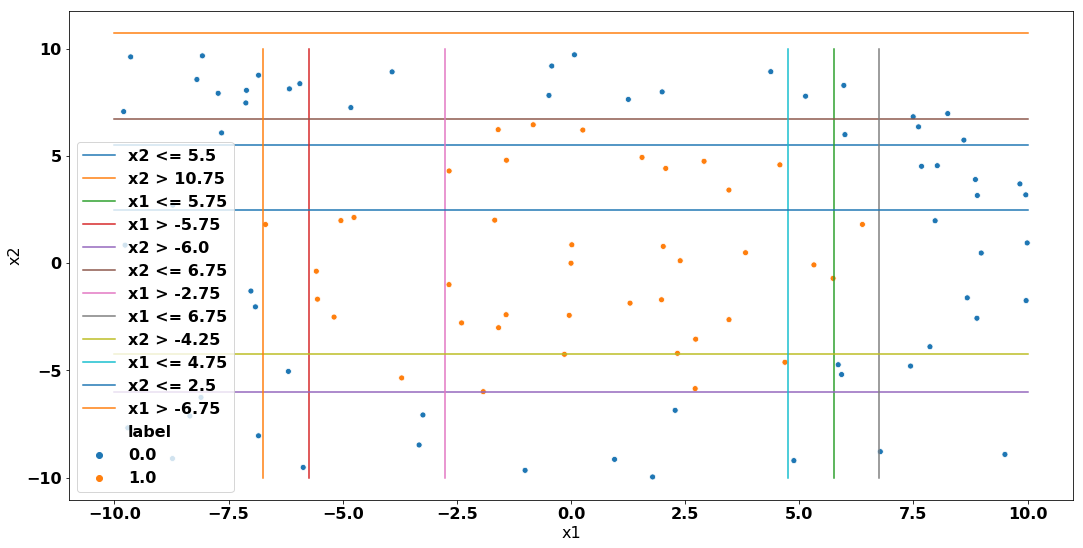

In [22]:
df = df.replace({'label': {-1.0: 0.0}})
fig, ax= plt.subplots(1,1, figsize=(18,9))

sns.scatterplot(df['x1'], df['x2'], hue=df['label'], ax=ax, hue_norm=(0,1))
for i in range(strongest_classifier['num_weak_classifiers']):
  classifer_eq = selected_classifiers_name[i]
  reg_exp = re.match("^(x[1,2]).* ([-\d\.]+)$", classifer_eq)
  column_name = reg_exp.group(1)
  inequality_value = reg_exp.group(2)
  X = np.arange(-10,11) if column_name == 'x2' else [float(inequality_value)]* 21
  y = np.arange(-10,11) if column_name == 'x1' else [float(inequality_value)]* 21
  ax.plot(X, y, label=classifer_eq)
  plt.legend()
plt.show()

